<a href="https://colab.research.google.com/github/plaban1981/DL_guided_Project/blob/main/Regression_using_DL_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Tutorial with the Keras Deep Learning Library in Python

##  Problem Description

Boston Housing dataset price prediction 

## Download data 

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

--2021-09-29 13:10:01--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49081 (48K) [text/plain]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  --.-KB/s    in 0.004s  

2021-09-29 13:10:02 (12.0 MB/s) - ‘housing.data’ saved [49081/49081]



In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Import keras library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Separate the datapoints into features and labels

In [ ]:
X = df.values[:,0:13]
Y = df.values[:,13]

## Def Base Model

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -35.32 (27.52) MSE



* Note: The mean squared error is negative because scikit-learn inverts so that the metric is maximized instead of minimized.
* The result reports the mean squared error including the average and standard deviation (average variance) across all 10 folds of the cross validation evaluation.

##  Modeling The Standardized Dataset

* Re-evaluate the same model using a standardized version of the input dataset.

* Use scikit-learn’s Pipeline framework to perform the standardization during the model evaluation process, within each fold of the cross validation. This ensures that there is no data leakage from each testset cross validation fold into the training data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -29.86 (26.27) MSE


* Standardization provides an improved performance over the baseline model without  dropping the error.

## Tune The Neural Network Topology

* One way to improve the performance a neural network is to add more layers. This might allow the model to extract and recombine higher order features embedded in the data

## Larger Model

In [ ]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

larger: -21.21 (25.47) MSE


## Wider Model

In [ ]:
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -23.05 (23.93) MSE


## Wild Blueberry Yield Prediction

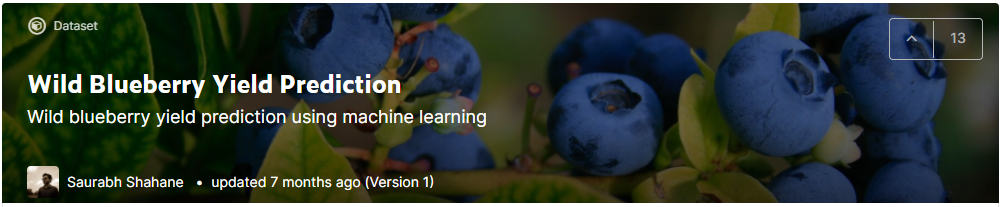

In [15]:
from google.colab import drive
drive.mount("/content/Drive")

Mounted at /content/Drive


In [16]:
! unzip "/content/Drive/MyDrive/AV_Hack/Blueberry Dataset.zip" -d "/content/Drive/MyDrive/AV_Hack/"

Archive:  /content/Drive/MyDrive/AV_Hack/Blueberry Dataset.zip
  inflating: /content/Drive/MyDrive/AV_Hack/Data in brief_WildBlueberryPollinationSimulation.docx  
  inflating: /content/Drive/MyDrive/AV_Hack/DL Template.ipynb  
  inflating: /content/Drive/MyDrive/AV_Hack/WildBlueberryPollinationSimulationData.csv  


In [17]:
df_berry = pd.read_csv("/content/Drive/MyDrive/AV_Hack/WildBlueberryPollinationSimulationData.csv")
df_berry.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [21]:
df_berry.isnull().sum()[df_berry.isnull().sum() > 0]

Series([], dtype: int64)

In [18]:
X = df_berry.drop('yield',axis=1).values
Y = df_berry['yield'].values

In [19]:
X.shape

(777, 17)

In [30]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=17, kernel_initializer='normal', activation='relu'))
	model.add(Dense(10, kernel_initializer='normal', activation='relu'))
	model.add(Dense(10, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [31]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

larger: -4686118.73 (13951213.66) MSE


* model.add(Dense(6, kernel_initializer='normal', activation='relu')): larger: -4931269.45 (14684237.75) MSE

* model.add(Dense(10, kernel_initializer='normal', activation='relu')) :larger: -4686118.73 (13951213.66) MSE

In [23]:
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=17, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -11911292.52 (33843582.26) MSE
